In [1]:
# Import Required Modules
import librosa
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.layers import SimpleRNN, LSTM
from keras.layers import Bidirectional

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# function to extract features from audio file
def getFeaturesTest(filename):

    # Reading File
    y,sr=librosa.load(filename)

    # Mel Frequency Cepstral Coefficients
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

    # Short Term Fourier Transform
    stft = np.abs(librosa.stft(y))

    # Chromagram from STFT
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)

    # Mel Spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y, sr=sr).T,axis=0)

    # Spectral Contrasts
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T,axis=0)

    # Tonal Centroid Features
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y),sr=sr).T,axis=0)

    # Flatten the array
    features = np.concatenate((mfcc, chroma, mel, contrast, tonnetz), axis=0)
    return np.array([features])

In [3]:
# Import Dataset
data = pd.read_csv('AudioFeaturesDataset6classes.csv')

# Input Features
x = np.array(data.drop(['Class'], axis=1))

# Label (Output Feature)
y = []
for i in range(data.shape[0]):
	if data.iloc[i, -1] == 'Axecutting_Sounds':
		y.append([1, 0, 0, 0, 0, 0])
	elif data.iloc[i, -1] == 'Chainsaw_Sounds':
		y.append([0, 1, 0, 0, 0, 0])
	elif data.iloc[i, -1] == 'Forest_Sounds':
		y.append([0, 0, 1, 0, 0, 0])
	elif data.iloc[i, -1] == 'Handsaw_Sounds':
		y.append([0, 0, 0, 1, 0, 0])
	elif data.iloc[i, -1] == 'Rain&Thunder_Sounds':
		y.append([0, 0, 0, 0, 1, 0])
	elif data.iloc[i, -1] == 'Wind_Sounds':
		y.append([0, 0, 0, 0, 0, 1])

# Randomize Data
x,y = shuffle(x, np.array(y))

In [4]:
# Splitting data for Training, Testing and Validation
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=101)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.15, random_state=101)

Artificial Neural Network (ANN) (6 Classes) [Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind]

In [5]:
# Defining Artificial Neural Network Model (ANN Architecture)
ANN = Sequential()

# Fully Connected Layer 1 with 128 Neurons
ANN.add(Dense(128, input_shape=(193,), activation = 'relu')) 
ANN.add(Dropout(0.1))

# Fully Connected Layer 2 with 128 Neurons
ANN.add(Dense(128, activation = 'relu'))
ANN.add(Dropout(0.25))

# Fully Connected Layer 3 with 128 Neurons
ANN.add(Dense(128, activation = 'relu'))
ANN.add(Dropout(0.5))    

# Output Layer with 2 Neurons and Softmax Activation Function
ANN.add(Dense(6, activation = 'softmax'))

# Loss Function Categorical Crossentropy for Categorical Classification
ANN.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               24832     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 6)                 7

In [6]:
# Training Artificial Neural Network (ANN) Model for 6 Classes
start = time.time()
history = ANN.fit(xtrain, ytrain, batch_size=5, epochs=10, verbose=1, validation_data=(xval,yval))
score, acc = ANN.evaluate(xtest, ytest, batch_size=5)

Epoch 1/10
1041/1041 [==============================] - 5s 3ms/step - loss: 1.4910 - accuracy: 0.7482 - val_loss: 0.6075 - val_accuracy: 0.9303
Epoch 2/10
1041/1041 [==============================] - 4s 4ms/step - loss: 0.5194 - accuracy: 0.9066 - val_loss: 0.3985 - val_accuracy: 0.9412
Epoch 3/10
1041/1041 [==============================] - 4s 4ms/step - loss: 0.3031 - accuracy: 0.9300 - val_loss: 0.1625 - val_accuracy: 0.9510
Epoch 4/10
1041/1041 [==============================] - 4s 3ms/step - loss: 0.2954 - accuracy: 0.9304 - val_loss: 0.1779 - val_accuracy: 0.9303
Epoch 5/10
1041/1041 [==============================] - 4s 3ms/step - loss: 0.2255 - accuracy: 0.9375 - val_loss: 0.1636 - val_accuracy: 0.9434
Epoch 6/10
1041/1041 [==============================] - 4s 3ms/step - loss: 0.1888 - accuracy: 0.9387 - val_loss: 0.1879 - val_accuracy: 0.9466
Epoch 7/10
1041/1041 [==============================] - 4s 3ms/step - loss: 0.2184 - accuracy: 0.9431 - val_loss: 0.1323 - val_accuracy:

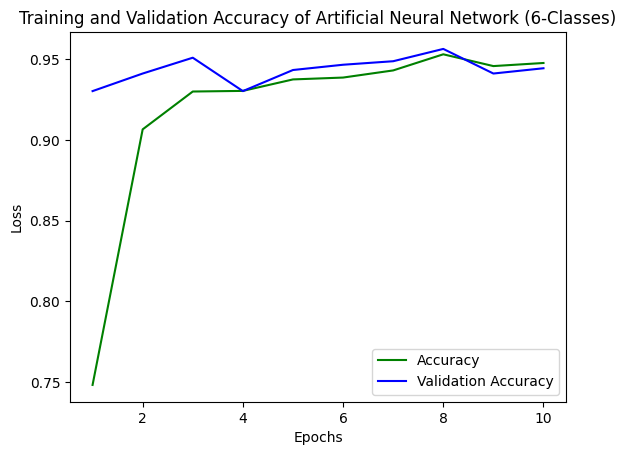

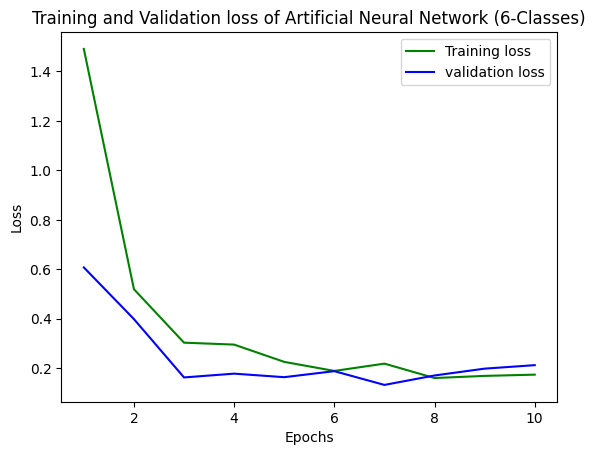

In [7]:
# Training and Validation Accuracy Graph of Aritificial Neural Network for 6 Classes
train = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, train, 'g', label='Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of Artificial Neural Network (6-Classes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Loss Graph of Aritificial Neural Network for 6 Classes
train = history.history['loss']
val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, train, 'g', label='Training loss')
plt.plot(epochs, val, 'b', label='validation loss')
plt.title('Training and Validation loss of Artificial Neural Network (6-Classes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# Accuracy and Training time of Artificial Neural Network (ANN) Model for 6 Classes
print('Test score :', score)
print('Test accuracy :', acc)
print('Training took : %d seconds' % int(time.time() - start))

Test score : 0.14269644021987915
Test accuracy : 0.9574074149131775
Training took : 38 seconds


In [9]:
# Classification Report of Artificial Neural Network (ANN) Model for 6 Classes
ypred = ANN.predict(xtest)
ypred = np.argmax(ypred, axis=1)
y_test = np.argmax(ytest, axis=1)
creport = classification_report(y_test,ypred)
print(classification_report(y_test,ypred))

34/34 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       176
           1       0.96      0.96      0.96       200
           2       1.00      0.98      0.99       173
           3       0.99      1.00      1.00       192
           4       0.88      0.96      0.92       167
           5       0.97      0.85      0.91       172

    accuracy                           0.96      1080
   macro avg       0.96      0.96      0.96      1080
weighted avg       0.96      0.96      0.96      1080



163/163 [==============================] - 0s 1ms/step


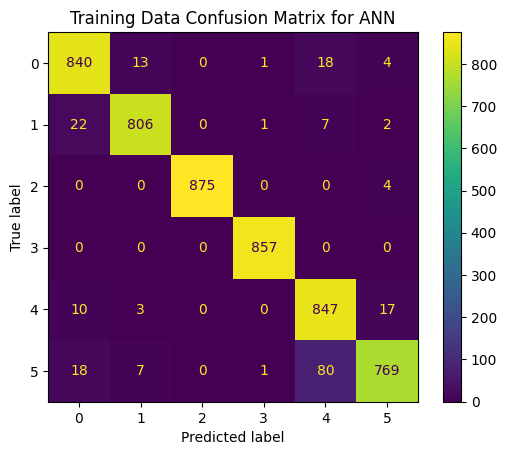

34/34 [==============================] - 0s 1ms/step


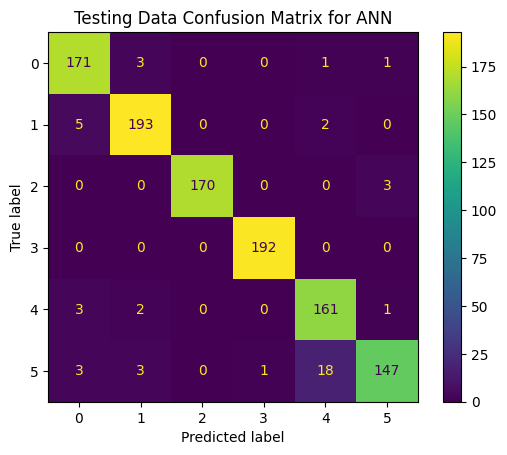

29/29 [==============================] - 0s 1ms/step


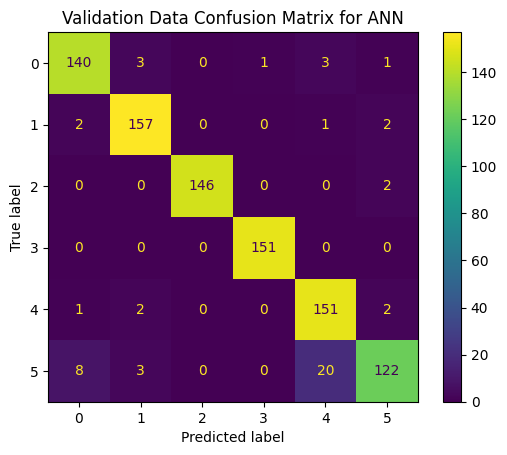

In [10]:
# Artificial Neural Network (ANN) Confusion Matrices on 6 Classes data
preds = ANN.predict(xtrain)
cm = confusion_matrix(np.argmax(ytrain, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Training Data Confusion Matrix for ANN')
plt.show()

preds = ANN.predict(xtest)
cm = confusion_matrix(np.argmax(ytest, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Testing Data Confusion Matrix for ANN')
plt.show()

preds = ANN.predict(xval)
cm = confusion_matrix(np.argmax(yval, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Validation Data Confusion Matrix for ANN')
plt.show()

In [11]:
# Custom Testing Artificial Neural network (ANN) (6 Classes) 
# [1, 0, 0, 0, 0, 0] - Axecutting
# [0, 1, 0, 0, 0, 0] - Chainsaw
# [0, 0, 1, 0, 0, 0] - Forest
# [0, 0, 0, 1, 0, 0] - Handsaw
# [0, 0, 0, 0, 1, 0] - Rain & Thunder
# [0, 0, 0, 0, 0, 1] - Wind

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test2.wav')
print('Shape of features :', testData.shape)
prediction = ANN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test3.wav')
print('Shape of features :', testData.shape)
prediction = ANN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test1.wav')
print('Shape of features :', testData.shape)
prediction = ANN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test4.wav')
print('Shape of features :', testData.shape)
prediction = ANN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test2.wav')
print('Shape of features :', testData.shape)
prediction = ANN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test5.wav')
print('Shape of features :', testData.shape)
prediction = ANN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test3.wav')
print('Shape of features :', testData.shape)
prediction = ANN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test2.wav')
print('Shape of features :', testData.shape)
prediction = ANN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test1.wav')
print('Shape of features :', testData.shape)
prediction = ANN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test4.wav')
print('Shape of features :', testData.shape)
prediction = ANN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test3.wav')
print('Shape of features :', testData.shape)
prediction = ANN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test5.wav')
print('Shape of features :', testData.shape)
prediction = ANN.predict(testData)
print(prediction)

Shape of features : (1, 193)
1/1 [==============================] - 0s 19ms/step
[[9.9999857e-01 8.4309556e-07 2.6922522e-11 2.8919679e-16 3.0116057e-10
  5.9380818e-07]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 17ms/step
[[4.3484330e-01 1.0750505e-01 1.0492533e-03 1.3970539e-04 2.5151059e-01
  2.0495214e-01]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 20ms/step
[[2.8909562e-17 1.0000000e+00 9.0001515e-25 0.0000000e+00 1.1131384e-19
  1.4220347e-23]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 20ms/step
[[1.1346107e-22 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2353251e-30
  2.9079820e-37]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 17ms/step
[[1.1755436e-17 1.7767798e-22 1.0000000e+00 1.5871367e-33 1.2526604e-22
  4.4197279e-19]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 18ms/step
[[5.2401683e-10 2.1211483e-10 1.0000000e+00 2.7659021e-18 2.0528

Convolutional Neural Network (CNN-1D) (6 Classes) [Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind]

In [12]:
# Defining Convolutional Neural Network Model (CNN Architecture)
CNN = Sequential()

# Convolutional Layer 1 with 64 Neurons and 193 Input Neurons
CNN.add(Conv1D(64, 3, activation='relu', input_shape=(193,1)))

# Convolutional Layer 2 with 64 Neurons
CNN.add(Conv1D(64, 3, activation='relu'))

# Pooling Layer 1
CNN.add(MaxPooling1D(3))

# Convolutional Layer 3 with 128 Neurons
CNN.add(Conv1D(128, 3, activation='relu'))

# Convolutional Layer 4 with 128 Neurons
CNN.add(Conv1D(128, 3, activation='relu'))

# Average Pooling Layer and Dropout Layer
CNN.add(GlobalAveragePooling1D())
CNN.add(Dropout(0.5))

# Output Layer for 4 classes
CNN.add(Dense(6, activation='softmax'))
CNN.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 191, 64)           256       
                                                                 
 conv1d_1 (Conv1D)           (None, 189, 64)           12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 63, 64)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 61, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 59, 128)           49280     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                               

In [13]:
# Training Convolutional Neural Network (CNN) Model for 6 Classes
start = time.time()
history = CNN.fit(xtrain, ytrain, batch_size=5, epochs=10, validation_data=(xval,yval))
score, acc = CNN.evaluate(xtest, ytest, batch_size=5)

Epoch 1/10
1041/1041 [==============================] - 9s 6ms/step - loss: 0.6074 - accuracy: 0.8108 - val_loss: 0.2365 - val_accuracy: 0.9281
Epoch 2/10
1041/1041 [==============================] - 6s 6ms/step - loss: 0.2267 - accuracy: 0.9393 - val_loss: 0.1783 - val_accuracy: 0.9346
Epoch 3/10
1041/1041 [==============================] - 6s 6ms/step - loss: 0.1852 - accuracy: 0.9443 - val_loss: 0.1785 - val_accuracy: 0.9477
Epoch 4/10
1041/1041 [==============================] - 7s 6ms/step - loss: 0.1675 - accuracy: 0.9468 - val_loss: 0.2222 - val_accuracy: 0.9434
Epoch 5/10
1041/1041 [==============================] - 6s 6ms/step - loss: 0.1761 - accuracy: 0.9493 - val_loss: 0.1936 - val_accuracy: 0.9477
Epoch 6/10
1041/1041 [==============================] - 6s 6ms/step - loss: 0.1697 - accuracy: 0.9500 - val_loss: 0.1882 - val_accuracy: 0.9379
Epoch 7/10
1041/1041 [==============================] - 6s 6ms/step - loss: 0.1729 - accuracy: 0.9494 - val_loss: 0.1531 - val_accuracy:

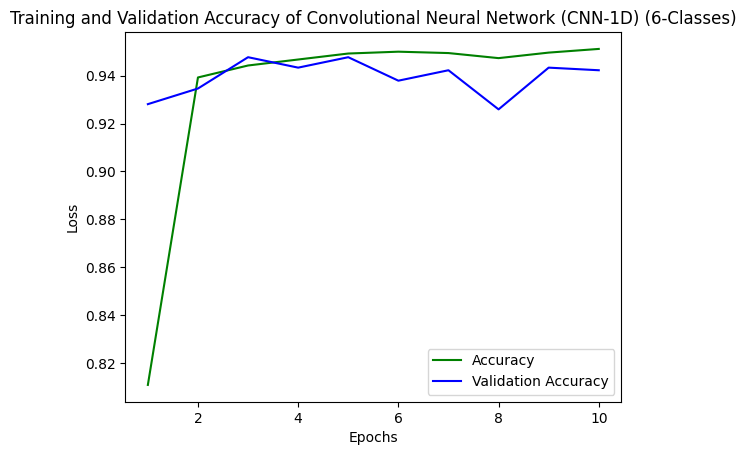

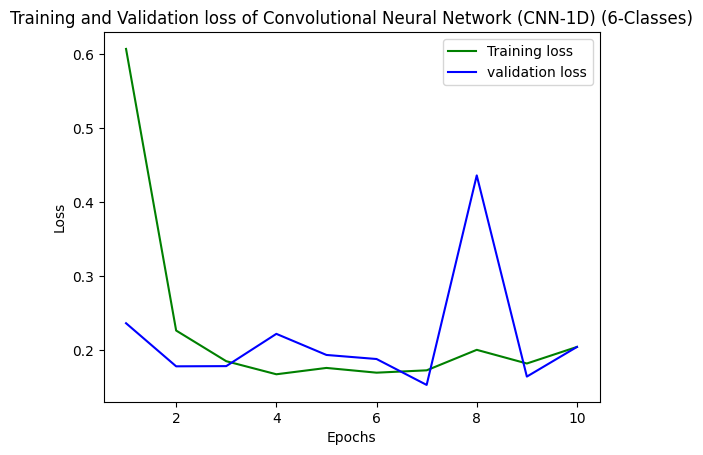

In [14]:
# Training and Validation Accuracy Graph of Convolution Neural Network for 6 Classes
train = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, train, 'g', label='Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of Convolutional Neural Network (CNN-1D) (6-Classes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Loss Graph of Convolutional Neural Network for 6 Classes
train = history.history['loss']
val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, train, 'g', label='Training loss')
plt.plot(epochs, val, 'b', label='validation loss')
plt.title('Training and Validation loss of Convolutional Neural Network (CNN-1D) (6-Classes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# Accuracy and Training time of Convolutional Neural Network (CNN-1D) Model for 6 Classes
print('Test score:', score)
print('Test accuracy:', acc)
print('Training took: %d seconds' % int(time.time() - start))

Test score: 0.16803987324237823
Test accuracy: 0.9509259462356567
Training took: 66 seconds


In [16]:
# Classification Report of Convolutional Neural Network (CNN-1D) Model for 6 Classes
ypred = CNN.predict(xtest)
ypred = np.argmax(ypred, axis=1)
y_test = np.argmax(ytest, axis=1)
print(classification_report(y_test,ypred))

34/34 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       176
           1       0.98      0.95      0.97       200
           2       0.99      1.00      1.00       173
           3       0.98      1.00      0.99       192
           4       0.94      0.86      0.90       167
           5       0.83      0.95      0.89       172

    accuracy                           0.95      1080
   macro avg       0.95      0.95      0.95      1080
weighted avg       0.95      0.95      0.95      1080



163/163 [==============================] - 0s 3ms/step


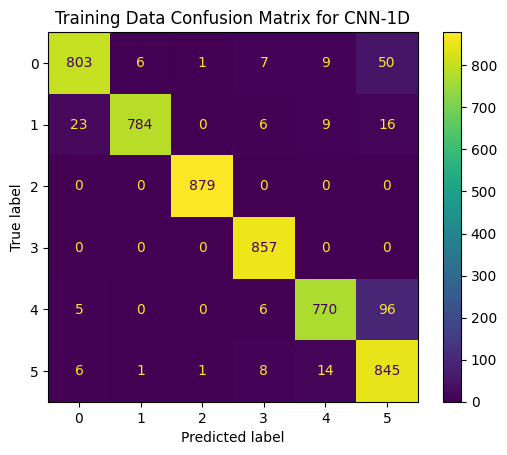

34/34 [==============================] - 0s 2ms/step


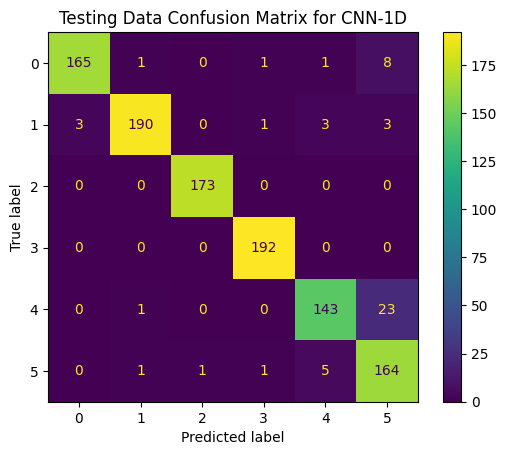

29/29 [==============================] - 0s 9ms/step


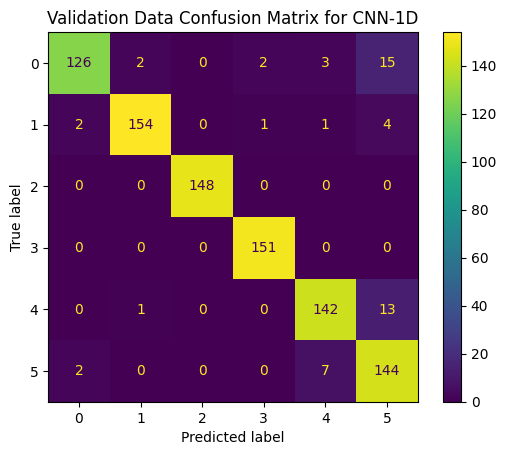

In [17]:
# Convolutional Neural Network (CNN-1D) Confusion Matrices on 6 Classes data
preds = CNN.predict(xtrain)
cm = confusion_matrix(np.argmax(ytrain, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Training Data Confusion Matrix for CNN-1D')
plt.show()

preds = CNN.predict(xtest)
cm = confusion_matrix(np.argmax(ytest, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Testing Data Confusion Matrix for CNN-1D')
plt.show()

preds = CNN.predict(xval)
cm = confusion_matrix(np.argmax(yval, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Validation Data Confusion Matrix for CNN-1D')
plt.show()

In [18]:
# Custom Testing Convolutional Neural network (CNN-1D) (6 Classes) 
# [1, 0, 0, 0, 0, 0] - Axecutting
# [0, 1, 0, 0, 0, 0] - Chainsaw
# [0, 0, 1, 0, 0, 0] - Forest
# [0, 0, 0, 1, 0, 0] - Handsaw
# [0, 0, 0, 0, 1, 0] - Rain & Thunder
# [0, 0, 0, 0, 0, 1] - Wind

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test2.wav')
print('Shape of features :', testData.shape)
prediction = CNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test3.wav')
print('Shape of features :', testData.shape)
prediction = CNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test1.wav')
print('Shape of features :', testData.shape)
prediction = CNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test4.wav')
print('Shape of features :', testData.shape)
prediction = CNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test2.wav')
print('Shape of features :', testData.shape)
prediction = CNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test5.wav')
print('Shape of features :', testData.shape)
prediction = CNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test3.wav')
print('Shape of features :', testData.shape)
prediction = CNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test2.wav')
print('Shape of features :', testData.shape)
prediction = CNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test1.wav')
print('Shape of features :', testData.shape)
prediction = CNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test4.wav')
print('Shape of features :', testData.shape)
prediction = CNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test3.wav')
print('Shape of features :', testData.shape)
prediction = CNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test5.wav')
print('Shape of features :', testData.shape)
prediction = CNN.predict(testData)
print(prediction)

Shape of features : (1, 193)
1/1 [==============================] - 0s 155ms/step
[[9.9999833e-01 1.4818355e-07 4.2107573e-07 2.1454401e-10 1.1606682e-07
  9.8987016e-07]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 19ms/step
[[1.2776127e-01 9.3329622e-04 3.9380215e-04 3.4471107e-06 1.6699801e-01
  7.0391011e-01]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 19ms/step
[[4.2952215e-07 9.9999952e-01 1.1688319e-16 3.0703643e-13 1.7834115e-09
  8.3685398e-10]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 21ms/step
[[4.43236292e-09 1.00000000e+00 3.40093590e-26 1.60417198e-13
  3.03036079e-13 1.40609595e-14]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 17ms/step
[[9.2851424e-09 1.1380729e-09 9.9999785e-01 1.6349491e-18 3.7131962e-08
  2.0669434e-06]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 19ms/step
[[3.3192766e-08 1.2769441e-09 1.0000000e+00 2.3008488e-16

Recurrent Neural Network (RNN-1D) (4 Classes) [Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind]

In [19]:
# Defining Simple Recurrent Neural Network Model (RNN Architecture)
RNN = Sequential()

# Fully Connected Layer
RNN.add(Dense(128, input_shape=(193,1)))

# Recurrent Layer (RNN) with 64 Neurons
RNN.add(SimpleRNN(64,activation='relu'))

# Fully Connected Layer
RNN.add(Dense(64, activation='relu'))
RNN.add(Dropout(0.5))

# Output Layer for 4 classes
RNN.add(Dense(6, activation='softmax'))
RNN.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
RNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 193, 128)          256       
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                12352     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 6)                 390       
                                                                 
Total params: 17,158
Trainable params: 17,158
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Training Simple Recurrent Neural Network (RNN) Model for 6 Classes
start = time.time()
history = RNN.fit(xtrain, ytrain, batch_size=5, epochs=10, validation_data=(xval,yval))
score, acc = RNN.evaluate(xtest, ytest, batch_size=5)

Epoch 1/10
1041/1041 [==============================] - 190s 182ms/step - loss: 1.7804 - accuracy: 0.1847 - val_loss: 1.7360 - val_accuracy: 0.1906
Epoch 2/10
1041/1041 [==============================] - 192s 184ms/step - loss: 1.5410 - accuracy: 0.3160 - val_loss: 1.3817 - val_accuracy: 0.3333
Epoch 3/10
1041/1041 [==============================] - 192s 185ms/step - loss: 1.0217 - accuracy: 0.5577 - val_loss: 0.7784 - val_accuracy: 0.6536
Epoch 4/10
1041/1041 [==============================] - 200s 192ms/step - loss: 0.9131 - accuracy: 0.6230 - val_loss: 0.7239 - val_accuracy: 0.6841
Epoch 5/10
1041/1041 [==============================] - 196s 188ms/step - loss: 0.8610 - accuracy: 0.6584 - val_loss: 1.0395 - val_accuracy: 0.5926
Epoch 6/10
1041/1041 [==============================] - 193s 185ms/step - loss: 0.8270 - accuracy: 0.6686 - val_loss: 0.8963 - val_accuracy: 0.6471
Epoch 7/10
1041/1041 [==============================] - 198s 190ms/step - loss: 0.8190 - accuracy: 0.6786 - val_

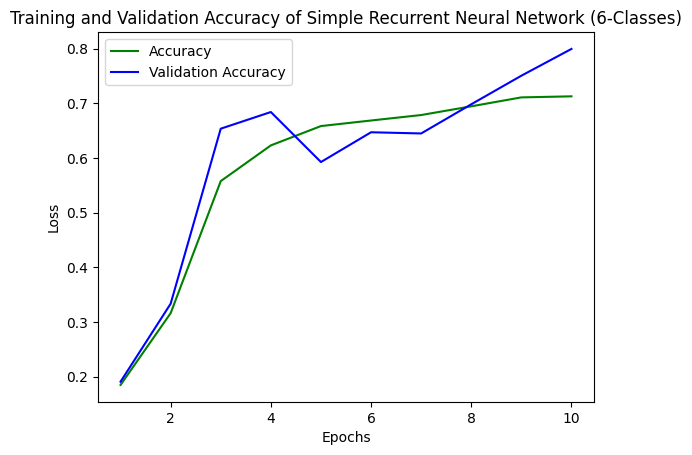

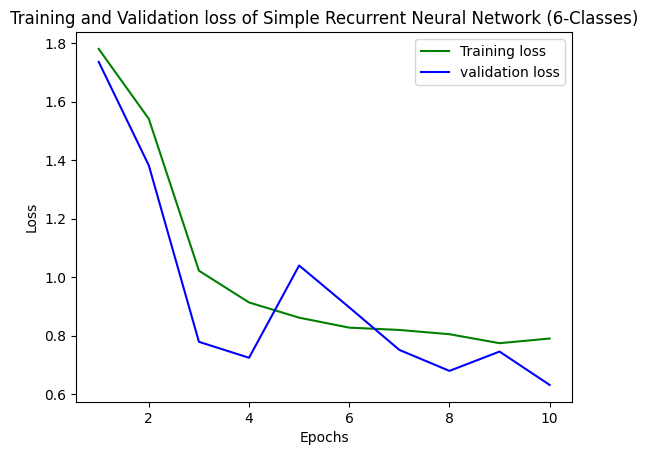

In [21]:
# Training and Validation Accuracy Graph of Simple Recurrent Neural Network (RNN) for 6 Classes
train = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, train, 'g', label='Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of Simple Recurrent Neural Network (6-Classes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Loss Graph of Simple Recurrent Neural Network (RNN) for 4 Classes
train = history.history['loss']
val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, train, 'g', label='Training loss')
plt.plot(epochs, val, 'b', label='validation loss')
plt.title('Training and Validation loss of Simple Recurrent Neural Network (6-Classes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
# Accuracy and Training time of Simple Recurrent Neural Network (RNN) Model for 6 Classes
print('Test score:', score)
print('Test accuracy:', acc)
print('Training took: %d seconds' % int(time.time() - start))

Test score: 0.6189931035041809
Test accuracy: 0.8120370507240295
Training took: 1952 seconds


In [23]:
# Classification Report of Simple Recurrent Neural Network (RNN) Model for 6 Classes
ypred = RNN.predict(xtest)
ypred = np.argmax(ypred, axis=1)
y_test = np.argmax(ytest, axis=1)
print(classification_report(y_test,ypred))

34/34 [==============================] - 1s 25ms/step
              precision    recall  f1-score   support

           0       0.90      0.80      0.84       176
           1       0.97      0.93      0.95       200
           2       0.91      0.77      0.83       173
           3       0.65      0.99      0.79       192
           4       0.87      0.56      0.68       167
           5       0.72      0.78      0.75       172

    accuracy                           0.81      1080
   macro avg       0.84      0.80      0.81      1080
weighted avg       0.84      0.81      0.81      1080



163/163 [==============================] - 4s 26ms/step


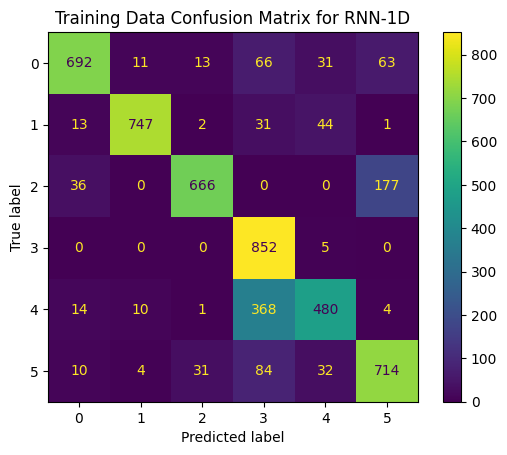

34/34 [==============================] - 1s 25ms/step


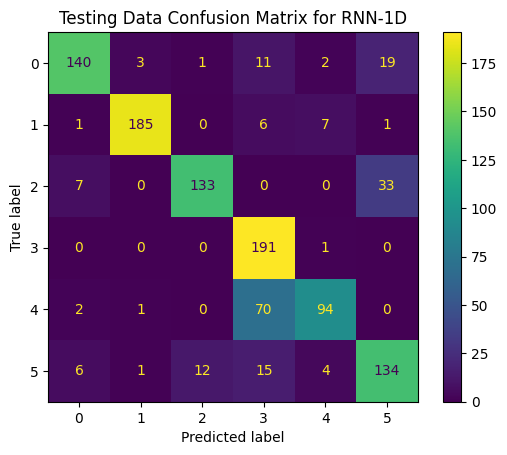

29/29 [==============================] - 1s 26ms/step


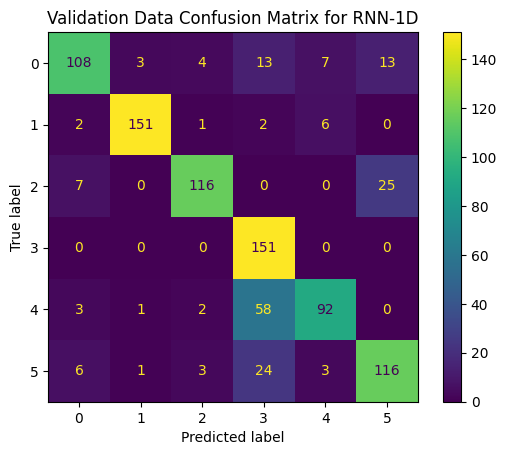

In [24]:
# Simple Recurrent Neural Network (RNN) Confusion Matrices on 6 Classes data
preds = RNN.predict(xtrain)
cm = confusion_matrix(np.argmax(ytrain, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Training Data Confusion Matrix for RNN-1D')
plt.show()

preds = RNN.predict(xtest)
cm = confusion_matrix(np.argmax(ytest, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Testing Data Confusion Matrix for RNN-1D')
plt.show()

preds = RNN.predict(xval)
cm = confusion_matrix(np.argmax(yval, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Validation Data Confusion Matrix for RNN-1D')
plt.show()

In [25]:
# Custom Testing Recurrent Neural network (RNN) (6 Classes) 
# [1, 0, 0, 0, 0, 0] - Axecutting
# [0, 1, 0, 0, 0, 0] - Chainsaw
# [0, 0, 1, 0, 0, 0] - Forest
# [0, 0, 0, 1, 0, 0] - Handsaw
# [0, 0, 0, 0, 1, 0] - Rain & Thunder
# [0, 0, 0, 0, 0, 1] - Wind

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test2.wav')
print('Shape of features :', testData.shape)
prediction = RNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test3.wav')
print('Shape of features :', testData.shape)
prediction = RNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test1.wav')
print('Shape of features :', testData.shape)
prediction = RNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test4.wav')
print('Shape of features :', testData.shape)
prediction = RNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test2.wav')
print('Shape of features :', testData.shape)
prediction = RNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test5.wav')
print('Shape of features :', testData.shape)
prediction = RNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test3.wav')
print('Shape of features :', testData.shape)
prediction = RNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test2.wav')
print('Shape of features :', testData.shape)
prediction = RNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test1.wav')
print('Shape of features :', testData.shape)
prediction = RNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test4.wav')
print('Shape of features :', testData.shape)
prediction = RNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test3.wav')
print('Shape of features :', testData.shape)
prediction = RNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test5.wav')
print('Shape of features :', testData.shape)
prediction = RNN.predict(testData)
print(prediction)

Shape of features : (1, 193)
1/1 [==============================] - 0s 55ms/step
[[5.0084299e-01 6.9080867e-05 1.2190861e-01 1.1409295e-04 5.5485859e-04
  3.7651035e-01]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 41ms/step
[[5.0020921e-03 4.1742381e-04 9.2386347e-01 3.0162648e-04 6.5241940e-04
  6.9762893e-02]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 40ms/step
[[3.2180245e-07 9.9996316e-01 4.0825281e-08 1.1228499e-09 3.5259694e-05
  1.2678299e-06]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 41ms/step
[[3.5777005e-06 9.9975997e-01 3.7071140e-07 3.7509679e-08 2.2589315e-04
  1.0225528e-05]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 41ms/step
[[7.7373264e-12 4.8051293e-13 9.9999976e-01 2.3143948e-17 1.4479164e-13
  1.9044001e-07]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 41ms/step
[[2.9399258e-03 1.2779231e-04 9.2871469e-01 6.7210800e-05 1.7711

Convolutional Recurrent Neural Network (CRNN-1D) (6 Classes) [Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind]

In [26]:
# Defining Convolutional Recurrent Neural Network Model (CRNN Architecture)
CRNN = Sequential()

# Convolutional Layer 1 with 64 Neurons and 193 Input Neurons
CRNN.add(Conv1D(64, 3, activation='relu', input_shape=(193,1)))

# Convolutional Layer 2 with 64 Neurons 
CRNN.add(Conv1D(64, 3, activation='relu'))

# Pooling Layer 1
CRNN.add(MaxPooling1D(3))

# Recurrent Layer 1 (LSTM) with 64 Neurons
CRNN.add(LSTM(64,return_sequences=False))

# Output Layer for 4 classes
CRNN.add(Dense(6, activation='softmax'))
CRNN.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
CRNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 191, 64)           256       
                                                                 
 conv1d_5 (Conv1D)           (None, 189, 64)           12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 63, 64)           0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense_8 (Dense)             (None, 6)                 390       
                                                                 
Total params: 46,022
Trainable params: 46,022
Non-trainable params: 0
__________________________________________________

In [27]:
# Training Convolutional Recurrent Neural Network (CRNN) Model for 6 Classes
start = time.time()
history = CRNN.fit(xtrain, ytrain, batch_size=5, epochs=10, validation_data=(xval,yval))
score, acc = CRNN.evaluate(xtest, ytest, batch_size=5)

Epoch 1/10
1041/1041 [==============================] - 14s 11ms/step - loss: 0.8289 - accuracy: 0.6532 - val_loss: 0.4343 - val_accuracy: 0.8322
Epoch 2/10
1041/1041 [==============================] - 11s 10ms/step - loss: 0.4612 - accuracy: 0.8158 - val_loss: 0.4302 - val_accuracy: 0.8595
Epoch 3/10
1041/1041 [==============================] - 11s 10ms/step - loss: 0.3783 - accuracy: 0.8593 - val_loss: 0.3344 - val_accuracy: 0.8627
Epoch 4/10
1041/1041 [==============================] - 11s 10ms/step - loss: 0.3417 - accuracy: 0.8735 - val_loss: 0.3056 - val_accuracy: 0.9139
Epoch 5/10
1041/1041 [==============================] - 11s 10ms/step - loss: 0.2861 - accuracy: 0.8989 - val_loss: 0.3140 - val_accuracy: 0.8943
Epoch 6/10
1041/1041 [==============================] - 11s 10ms/step - loss: 0.2365 - accuracy: 0.9156 - val_loss: 0.2129 - val_accuracy: 0.9237
Epoch 7/10
1041/1041 [==============================] - 11s 10ms/step - loss: 0.2397 - accuracy: 0.9183 - val_loss: 0.3409 -

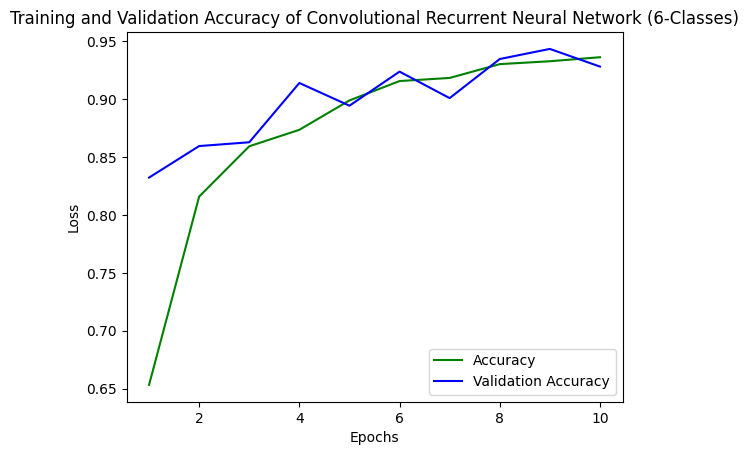

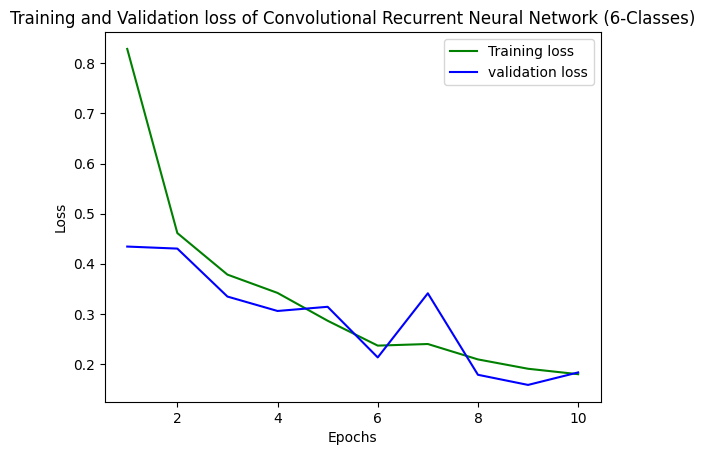

In [28]:
# Training and Validation Accuracy Graph of Convolution Recurrent Neural Network for 6 Classes
train = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, train, 'g', label='Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of Convolutional Recurrent Neural Network (6-Classes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Loss Graph of Convolutional Recurrent Neural Network for 6 Classes
train = history.history['loss']
val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, train, 'g', label='Training loss')
plt.plot(epochs, val, 'b', label='validation loss')
plt.title('Training and Validation loss of Convolutional Recurrent Neural Network (6-Classes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
# Accuracy and Training time of Convolutional Recuurent Neural Network (CRNN) Model for 6 Classes
print('Test score:', score)
print('Test accuracy:', acc)
print('Training took: %d seconds' % int(time.time() - start))

Test score: 0.15008510649204254
Test accuracy: 0.9388889074325562
Training took: 111 seconds


In [30]:
# Classification Report of Convolutional Recurrent Neural Network (CRNN) Model for 6 Classes
ypred = CRNN.predict(xtest)
ypred = np.argmax(ypred, axis=1)
y_test = np.argmax(ytest, axis=1)
print(classification_report(y_test,ypred))

34/34 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       176
           1       0.99      0.96      0.97       200
           2       0.99      0.92      0.95       173
           3       0.99      1.00      0.99       192
           4       0.87      0.96      0.91       167
           5       0.92      0.85      0.89       172

    accuracy                           0.94      1080
   macro avg       0.94      0.94      0.94      1080
weighted avg       0.94      0.94      0.94      1080



163/163 [==============================] - 1s 4ms/step


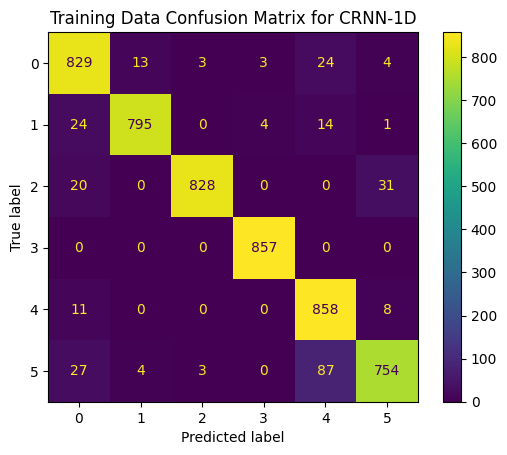

34/34 [==============================] - 0s 4ms/step


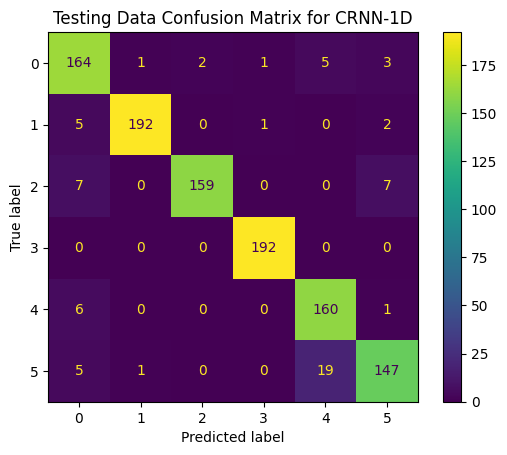

29/29 [==============================] - 0s 3ms/step


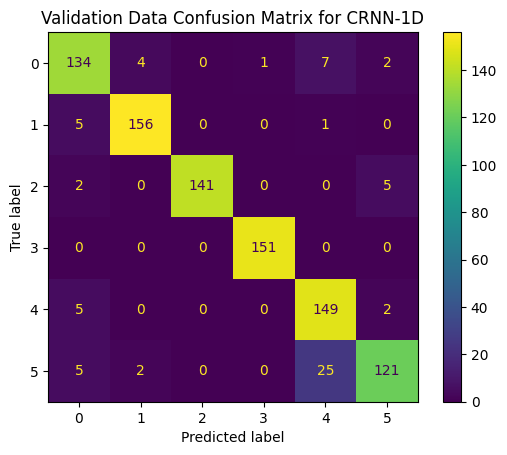

In [31]:
# Convolutional Recurrent Neural Network (CRNN) Confusion Matrices on 6 Classes data
preds = CRNN.predict(xtrain)
cm = confusion_matrix(np.argmax(ytrain, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Training Data Confusion Matrix for CRNN-1D')
plt.show()

preds = CRNN.predict(xtest)
cm = confusion_matrix(np.argmax(ytest, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Testing Data Confusion Matrix for CRNN-1D')
plt.show()

preds = CRNN.predict(xval)
cm = confusion_matrix(np.argmax(yval, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Validation Data Confusion Matrix for CRNN-1D')
plt.show()

In [32]:
# Custom Testing Convolutional Recurrent Neural network (CRNN-1D) (6 Classes) 
# [1, 0, 0, 0, 0, 0] - Axecutting
# [0, 1, 0, 0, 0, 0] - Chainsaw
# [0, 0, 1, 0, 0, 0] - Forest
# [0, 0, 0, 1, 0, 0] - Handsaw
# [0, 0, 0, 0, 1, 0] - Rain & Thunder
# [0, 0, 0, 0, 0, 1] - Wind

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test2.wav')
print('Shape of features :', testData.shape)
prediction = CRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test3.wav')
print('Shape of features :', testData.shape)
prediction = CRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test1.wav')
print('Shape of features :', testData.shape)
prediction = CRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test4.wav')
print('Shape of features :', testData.shape)
prediction = CRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test2.wav')
print('Shape of features :', testData.shape)
prediction = CRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test5.wav')
print('Shape of features :', testData.shape)
prediction = CRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test3.wav')
print('Shape of features :', testData.shape)
prediction = CRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test2.wav')
print('Shape of features :', testData.shape)
prediction = CRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test1.wav')
print('Shape of features :', testData.shape)
prediction = CRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test4.wav')
print('Shape of features :', testData.shape)
prediction = CRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test3.wav')
print('Shape of features :', testData.shape)
prediction = CRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test5.wav')
print('Shape of features :', testData.shape)
prediction = CRNN.predict(testData)
print(prediction)

Shape of features : (1, 193)
1/1 [==============================] - 0s 23ms/step
[[9.9791783e-01 4.9003592e-04 1.2795346e-04 1.0317201e-04 2.4997944e-04
  1.1110711e-03]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 21ms/step
[[1.8531659e-01 2.2869412e-02 2.0462653e-02 2.2090278e-05 4.0120718e-01
  3.7012213e-01]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 21ms/step
[[1.7512945e-03 9.9792659e-01 6.6414227e-06 8.7355320e-06 1.5405696e-04
  1.5273831e-04]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 19ms/step
[[1.7972533e-02 9.7713006e-01 3.1917420e-04 1.4490585e-06 4.1216859e-03
  4.5500850e-04]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 22ms/step
[[1.0239979e-04 3.1969722e-04 9.9097216e-01 1.9613903e-07 5.4766564e-03
  3.1288725e-03]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 20ms/step
[[1.0922180e-03 3.6456357e-05 9.9251127e-01 2.9372418e-07 2.9701

Bidirectional Convolutional Recurrant Neural Network (Bi-CRNN-1D) (6 Classes) [Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind]

In [33]:
# Defining Bidirectional Convolutional Recurrent Neural Network Model (Bi-CRNN Architecture)
BICRNN = Sequential()

# Convolutional Layer 1 with 64 Neurons and 193 Input Neurons
BICRNN.add(Conv1D(64, 3, activation='relu', input_shape=(193,1)))

# Convolutional Layer 2 with 64 Neurons 
BICRNN.add(Conv1D(64, 3, activation='relu'))

# Pooling Layer 1
BICRNN.add(MaxPooling1D(3))

# Bi-Directional Recurrent Layer 1 (Bi-LSTM) with 64 Neurons
BICRNN.add(Bidirectional(layer=LSTM(64,return_sequences=False),merge_mode='concat'))

# Output Layer for 4 classes
BICRNN.add(Dense(6, activation='softmax'))
BICRNN.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
BICRNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 191, 64)           256       
                                                                 
 conv1d_7 (Conv1D)           (None, 189, 64)           12352     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 63, 64)           0         
 1D)                                                             
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense_9 (Dense)             (None, 6)                 774       
                                                                 
Total params: 79,430
Trainable params: 79,430
Non-trai

In [34]:
# Training Bidirectional Convolutional Recurrent Neural Network (Bi-CRNN) Model for 6 Classes
start = time.time()
history = BICRNN.fit(xtrain, ytrain, batch_size=5, epochs=10, validation_data=(xval,yval))
score, acc = BICRNN.evaluate(xtest, ytest, batch_size=5)

Epoch 1/10
1041/1041 [==============================] - 19s 16ms/step - loss: 0.2757 - accuracy: 0.9210 - val_loss: 0.3594 - val_accuracy: 0.8824
Epoch 2/10
1041/1041 [==============================] - 16s 15ms/step - loss: 0.1586 - accuracy: 0.9481 - val_loss: 0.1568 - val_accuracy: 0.9434
Epoch 3/10
1041/1041 [==============================] - 16s 15ms/step - loss: 0.1456 - accuracy: 0.9493 - val_loss: 0.1512 - val_accuracy: 0.9368
Epoch 4/10
1041/1041 [==============================] - 16s 16ms/step - loss: 0.1458 - accuracy: 0.9496 - val_loss: 0.1887 - val_accuracy: 0.9325
Epoch 5/10
1041/1041 [==============================] - 17s 16ms/step - loss: 0.1414 - accuracy: 0.9508 - val_loss: 0.1628 - val_accuracy: 0.9379
Epoch 6/10
1041/1041 [==============================] - 16s 16ms/step - loss: 0.1345 - accuracy: 0.9533 - val_loss: 0.1716 - val_accuracy: 0.9379
Epoch 7/10
1041/1041 [==============================] - 17s 16ms/step - loss: 0.1307 - accuracy: 0.9539 - val_loss: 0.2042 -

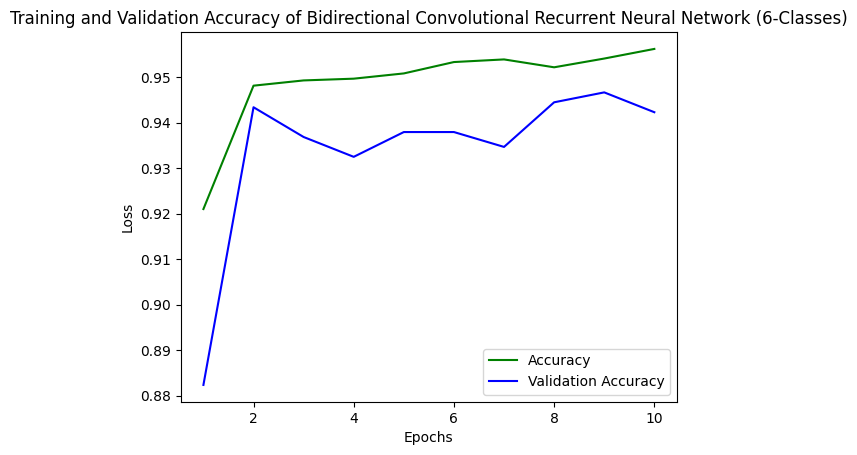

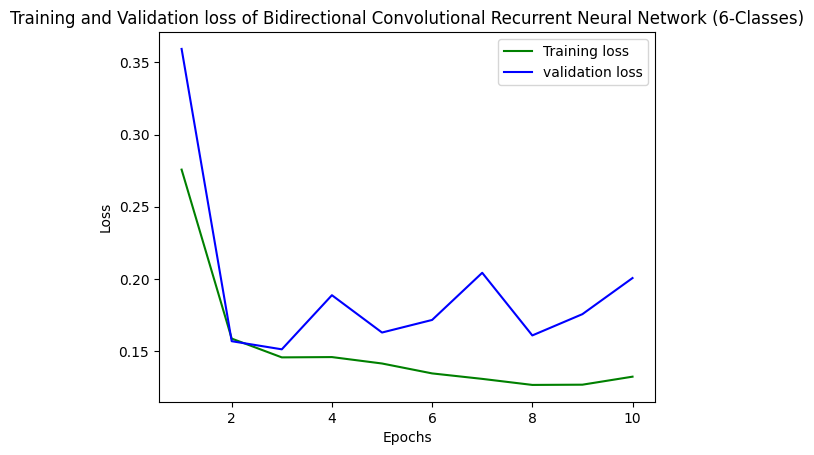

In [35]:
# Training and Validation Accuracy Graph of Bidirectional Convolution Recurrent Neural Network for 6 Classes
train = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, train, 'g', label='Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of Bidirectional Convolutional Recurrent Neural Network (6-Classes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Loss Graph of Bidirectional Convolutional Recurrent Neural Network for 6 Classes
train = history.history['loss']
val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, train, 'g', label='Training loss')
plt.plot(epochs, val, 'b', label='validation loss')
plt.title('Training and Validation loss of Bidirectional Convolutional Recurrent Neural Network (6-Classes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
# Accuracy and Training time of Bidirectional Convolutional Recurrent Neural Network (Bi-CRNN) Model for 6 Classes
print('Test score:', score)
print('Test accuracy:', acc)
print('Training took: %d seconds' % int(time.time() - start))

Test score: 0.15989729762077332
Test accuracy: 0.9527778029441833
Training took: 169 seconds


In [37]:
# Classification Report of Bidirectional Convolutional Recurrent Neural Network (Bi-CRNN) Model for 6 Classes
ypred = BICRNN.predict(xtest)
ypred = np.argmax(ypred, axis=1)
y_test = np.argmax(ytest, axis=1)
print(classification_report(y_test,ypred))

34/34 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       176
           1       0.96      0.97      0.96       200
           2       1.00      1.00      1.00       173
           3       0.94      1.00      0.97       192
           4       0.93      0.91      0.92       167
           5       0.94      0.87      0.91       172

    accuracy                           0.95      1080
   macro avg       0.95      0.95      0.95      1080
weighted avg       0.95      0.95      0.95      1080



163/163 [==============================] - 1s 6ms/step


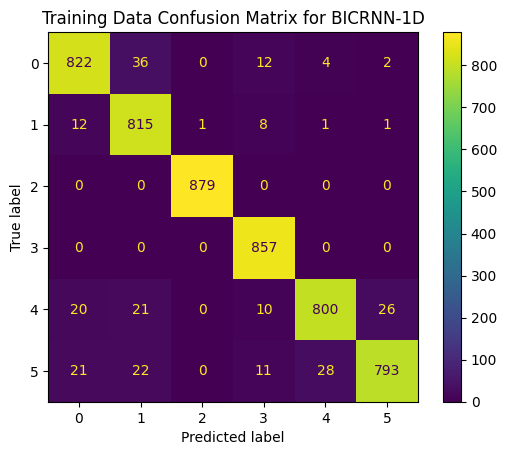

34/34 [==============================] - 0s 5ms/step


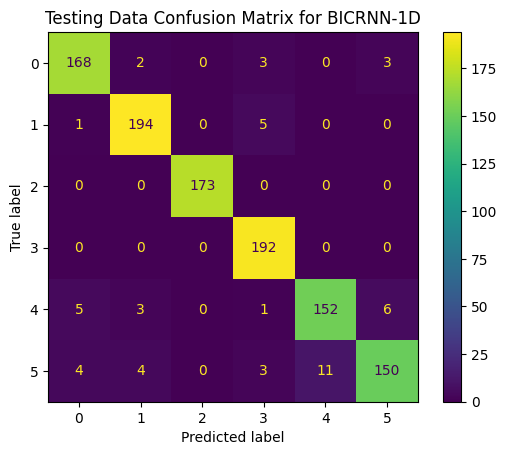

29/29 [==============================] - 0s 8ms/step


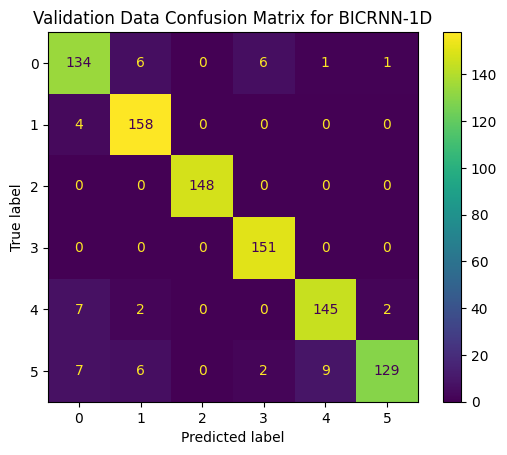

In [38]:
# Bidirectional Convolutional Recurrent Neural Network (Bi-BICRNN) Confusion Matrices on 6 Classes data
preds = BICRNN.predict(xtrain)
cm = confusion_matrix(np.argmax(ytrain, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Training Data Confusion Matrix for BICRNN-1D')
plt.show()

preds = BICRNN.predict(xtest)
cm = confusion_matrix(np.argmax(ytest, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Testing Data Confusion Matrix for BICRNN-1D')
plt.show()

preds = BICRNN.predict(xval)
cm = confusion_matrix(np.argmax(yval, axis=1), np.argmax(preds, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Validation Data Confusion Matrix for BICRNN-1D')
plt.show()

In [39]:
# Custom Testing Bi-Directional Convolutional Recurrent Neural network (BICRNN-1D) (6 Classes) 
# [1, 0, 0, 0, 0, 0] - Axecutting
# [0, 1, 0, 0, 0, 0] - Chainsaw
# [0, 0, 1, 0, 0, 0] - Forest
# [0, 0, 0, 1, 0, 0] - Handsaw
# [0, 0, 0, 0, 1, 0] - Rain & Thunder
# [0, 0, 0, 0, 0, 1] - Wind

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test2.wav')
print('Shape of features :', testData.shape)
prediction = BICRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Axecutting_test3.wav')
print('Shape of features :', testData.shape)
prediction = BICRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test1.wav')
print('Shape of features :', testData.shape)
prediction = BICRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Chainsaw_test4.wav')
print('Shape of features :', testData.shape)
prediction = BICRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test2.wav')
print('Shape of features :', testData.shape)
prediction = BICRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Forest_test5.wav')
print('Shape of features :', testData.shape)
prediction = BICRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test3.wav')
print('Shape of features :', testData.shape)
prediction = BICRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Handsaw_test2.wav')
print('Shape of features :', testData.shape)
prediction = BICRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test1.wav')
print('Shape of features :', testData.shape)
prediction = BICRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Rain&Thunder_test4.wav')
print('Shape of features :', testData.shape)
prediction = BICRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test3.wav')
print('Shape of features :', testData.shape)
prediction = BICRNN.predict(testData)
print(prediction)

testData = getFeaturesTest('Test Audio data (6 Classes)\Wind_test5.wav')
print('Shape of features :', testData.shape)
prediction = BICRNN.predict(testData)
print(prediction)

Shape of features : (1, 193)
1/1 [==============================] - 0s 23ms/step
[[9.9994528e-01 1.6812424e-05 2.9427547e-06 7.9016104e-08 2.1364298e-05
  1.3591181e-05]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 23ms/step
[[8.8578564e-01 1.5771227e-02 2.8557602e-07 1.4159072e-05 5.2161347e-02
  4.6267379e-02]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 33ms/step
[[5.9934316e-04 9.9931657e-01 1.1423473e-06 1.8855862e-05 8.1360731e-06
  5.5963043e-05]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 23ms/step
[[1.5804281e-03 9.9214113e-01 1.7517741e-07 4.6636215e-03 5.9709753e-05
  1.5548533e-03]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 23ms/step
[[3.9345576e-07 7.1636096e-05 9.9980789e-01 2.2096183e-09 9.7527573e-06
  1.1033836e-04]]
Shape of features : (1, 193)
1/1 [==============================] - 0s 27ms/step
[[5.1289749e-06 1.8558313e-06 9.9998868e-01 7.0388673e-10 6.7583

# Accuracy of All the Models

In [40]:
print("\n1 - Artificial Neural Network (ANN) Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): ")
score, acc = ANN.evaluate(xtest, ytest, batch_size=5)
print('    Accuracy:', acc)
print('    Loss:', score)

print("\n2 - Convolutional Neural Network (CNN 1-D) Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): ")
score, acc = CNN.evaluate(xtest, ytest, batch_size=5)
print('    Accuracy:', acc)
print('    Loss:', score)

print("\n3 - Recurrent Neural Network (RNN) Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): ")
score, acc = RNN.evaluate(xtest, ytest, batch_size=5)
print('    Accuracy:', acc)
print('    Loss:', score)

print("\n4 - Convolutional Recurrent Neural Network (CRNN 1-D) Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): ")
score, acc = CRNN.evaluate(xtest, ytest, batch_size=5)
print('    Accuracy:', acc)
print('    Loss:', score)

print("\n5 - Bi-Directional Convolutional Recurrent Neural Network (BI-CRNN 1-D) Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): ")
score, acc = BICRNN.evaluate(xtest, ytest, batch_size=5)
print('    Accuracy:', acc)
print('    Loss:', score)


1 - Artificial Neural Network (ANN) Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): 
216/216 [==============================] - 1s 3ms/step - loss: 0.1427 - accuracy: 0.9574
    Accuracy: 0.9574074149131775
    Loss: 0.14269644021987915

2 - Convolutional Neural Network (CNN 1-D) Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): 
216/216 [==============================] - 1s 3ms/step - loss: 0.1680 - accuracy: 0.9509
    Accuracy: 0.9509259462356567
    Loss: 0.16803987324237823

3 - Recurrent Neural Network (RNN) Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): 
216/216 [==============================] - 6s 28ms/step - loss: 0.6190 - accuracy: 0.8120
    Accuracy: 0.8120370507240295
    Loss: 0.6189931035041809

4 - Convolutional Recurrent Neural Network (CRNN 1-D) Metrics for 6 classes is (Axecutting, Chainsaw, Forest, Handsaw, Rain & Thunder, Wind): 
216/216 [=======